In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('../Data/Images/shapes.jpg')

cv2.imshow('Input Image', image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)

cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)


_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


print("Number of Contours found = " + str(len(contours)))


cv2.drawContours(image, contours, -1, (0,255,0), 3)


cv2.imshow('Contours', image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()


cv2.destroyAllWindows()

<Figure size 640x480 with 1 Axes>

Number of Contours found = 3


<Figure size 640x480 with 1 Axes>

In [3]:
print(contours)

[array([[[368, 157]],

       [[366, 159]],

       [[367, 160]],

       [[366, 161]],

       [[366, 296]],

       [[367, 297]],

       [[367, 302]],

       [[487, 302]],

       [[488, 303]],

       [[491, 303]],

       [[493, 301]],

       [[492, 300]],

       [[492, 299]],

       [[493, 298]],

       [[493, 297]],

       [[492, 296]],

       [[492, 160]],

       [[493, 159]],

       [[491, 157]],

       [[490, 158]],

       [[487, 158]],

       [[486, 157]]], dtype=int32), array([[[520,  63]],

       [[518,  65]],

       [[518, 310]],

       [[519, 311]],

       [[782, 311]],

       [[782,  64]],

       [[781,  63]]], dtype=int32), array([[[ 16,  19]],

       [[ 15,  20]],

       [[ 15,  21]],

       [[ 14,  22]],

       [[ 14, 305]],

       [[ 15, 306]],

       [[ 15, 308]],

       [[330, 308]],

       [[330, 307]],

       [[331, 306]],

       [[331, 304]],

       [[330, 303]],

       [[330,  23]],

       [[331,  22]],

       [[331,  21]],

   

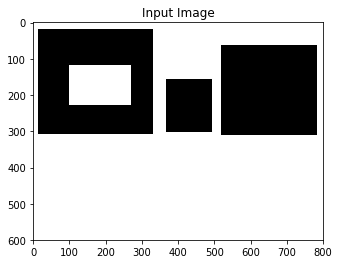

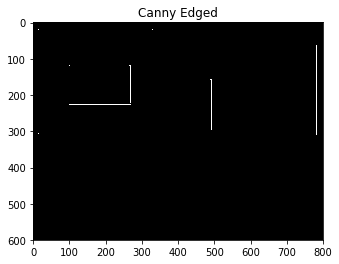

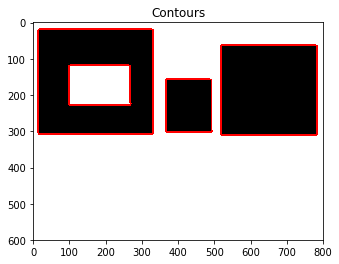

In [2]:
import cv2
import numpy as np


image = cv2.imread('../Data/Images/shapes_donut.jpg')

cv2.imshow('Input Image', image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)

cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)

plt.imshow(edged, cmap='gray')
plt.title('Canny Edged')
plt.show()

_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


cv2.drawContours(image, contours, -1, (0,0,255), 4)


cv2.imshow('Contours', image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()


cv2.destroyAllWindows()

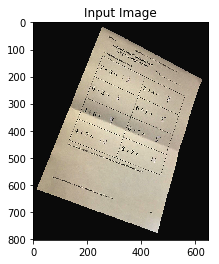

Number of Contours found = 1


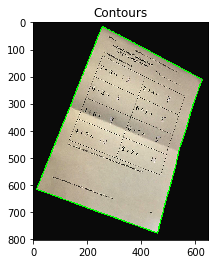

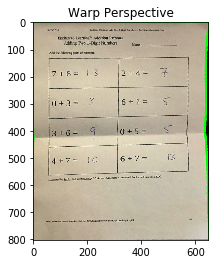

In [5]:
import cv2
import numpy as np

image = original_image =  cv2.imread('../Data/Images/scan2.jpg')

cv2.imshow('Input Image', image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 1, 200)


_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contours)))


cv2.drawContours(image, contours, -1, (0,255,0), 3)
cnt = contours[0]

cv2.imshow('Contours', image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()


leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])


img_height = image.shape[1]
img_width = image.shape[0]


points_A = np.float32([topmost, rightmost, leftmost, bottommost])
points_B = np.float32([[0,0], [img_height,0], [0,img_width], [img_height,img_width]])

M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(original_image, M, (img_height,img_width))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title('Warp Perspective')
plt.show()

cv2.destroyAllWindows()